## RNN model to predict Google Stock price


#### Here i'm building RNN model to predict Google Stock for Jan-2017

#### i'm using google stock price from 2012 to 2016 to train my model then i'll compare model prediction with actual stock price  

In [ ]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('data/Google_Stock_Price_Train.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set=df.iloc[:,1:2].values
training_set.shape


(1258, 1)



![scaling](data/scaling.png)

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1)) # not need to add 0 to 1 its the default value

training_set_scaled=sc.fit_transform(training_set)
training_set_scaled.shape

(1258, 1)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

# we look at past 60 days of price 

# then we create seperate rows include 60 days  of price changes 

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
    
    # x_train and y_train are list so we convert it to numpy array 
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape , y_train.shape

((1198, 60), (1198,))

In [6]:
# if we want to compare past 80 days
# X_train = []
# y_train = []
# for i in range (80, 1258):
#     X_train.append(training_set_scaled[i-80:i,0])
#     y_train.append(training_set_scaled[i,0])

# X_train, y_train = np.array(X_train), np.array(y_train) 
    
# X_train.shape , y_train.shape



### keras documentation

- RNN needs 3D array

- 3D tensor with shape (batch_size, timesteps, input_dim).

- here batch_size is stock price that we have
- timesteps is 60 days 

- and input_dim we can add the other stock price if we belive the are highly correlated
    - like stock of apple and samsung

In [7]:
# now have only one indicator (popen price ) however we can add more indicator we reshpae function



# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

# # or 
# X_train = np.reshape(X_train,(1198,60,1))
# X_train.shape

(1198, 60, 1)

In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:

# Initialising the RNN
regressor = Sequential()

In [10]:
# Adding the first LSTM layer and some Dropout regularisation

# 3 arguments for LSTM , 

        # numer of unit  : number of nuerals you need in model ==>  larg number of nuerans is good
    
        
        # return sequences=True should be true to add more layers
                # if we dont add default value is False (usually on the last layers)
        
        
        # input shape is the shape of input that we have on training 
                    # note for input we dont add all 3 by default the first one number of observation (batch)
                    # is included in model
        
regressor.add(LSTM(units=50 ,return_sequences=True , input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))  # dropout is lost some learned weight to avoid overfitting

In [12]:
# adding second layer

# like ANN model we dont need input_dim for second layer becasue model already know what is input from previous layer

regressor.add(LSTM(units=50 ,return_sequences=True))
regressor.add(Dropout(rate=0.2))  # dropout is lost some learned weight to avoid overfitting



In [13]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [14]:
# as mentioned above return_sequences=Fasle for the last layer becasue we dont need too stack another layer

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [16]:

# adding output layer

# units because we want to get the stock pricce so its is one 

regressor.add(Dense(units=1))

In [17]:
# in keras RSMprop is recommenred  but we use this one check optimizer on keras documentation

# losss here is not binary classification becasue we are predicting continus values we need to to use MSE

regressor.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [20]:
# Fitting the RNN to the Training set

# batch_size is number of observation to check each time and then backprobagated (batsize for eact input)
regressor.fit(X_train , y_train , epochs=150 , batch_size=15)

Epoch 1/150
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0052
Epoch 2/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0056
Epoch 3/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0046
Epoch 4/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0041
Epoch 5/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0042
Epoch 6/150
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0046
Epoch 7/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0045
Epoch 8/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0041
Epoch 9/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0035
Epoch 10/150
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0036
Epoch 11/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0038
Epoch 12/150
1198/1198 [============================

1198/1198 [==============================] - 14s 11ms/step - loss: 0.0012
Epoch 96/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0012
Epoch 97/150
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0013
Epoch 98/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0011
Epoch 99/150
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0011
Epoch 100/150
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0013
Epoch 101/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0012
Epoch 102/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0012
Epoch 103/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0012
Epoch 104/150
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0011
Epoch 105/150
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0011
Epoch 106/150
1198/1198 [=========================

In [23]:
# Part 3 - Making the predictions and visualising the results

# test file has only 20 days of stock price

dataset_test= pd.read_csv('data/Google_Stock_Price_Test.csv')

print (dataset_test.shape)

testing_set= dataset_test.iloc[:,1:2].values

dataset_test.head()

(20, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [122]:
# Getting the predicted stock price of 2017

# for prediction we need last 60 days of stock price

complete_dataset=pd.concat((df['Open'], dataset_test['Open']), axis=0)  # now we have all stock price including 2017

print (complete_dataset.shape)

complete_dataset.head()


(1278,)


0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [132]:

# we need last 60 

#inputs= complete_dataset.tail(60)

#or



#complete_dataset[-60:]

inputs=complete_dataset[len(complete_dataset)-len(testing_set)-60:].values

print (inputs.shape)


# change the shape to array 60,1

inputs = inputs.reshape(-1,1)



# now we need to scale these inputs

inputs = sc.transform(inputs)
print (inputs.shape)


(80,)
(80, 1)


In [133]:
# now we use the same loop to get the last 60 data but we dont need y becasue we predict it
X_test=[]


for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
 
X_test =np.array(X_test)
X_test.shape

(20, 60)

In [134]:
# we add more dimensions 3D 

X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test.shape

(20, 60, 1)

In [135]:
# make prediction we\ith model

Stock_price_predciton=regressor.predict(X_test)

Stock_price_predciton=sc.inverse_transform(Stock_price_predciton)

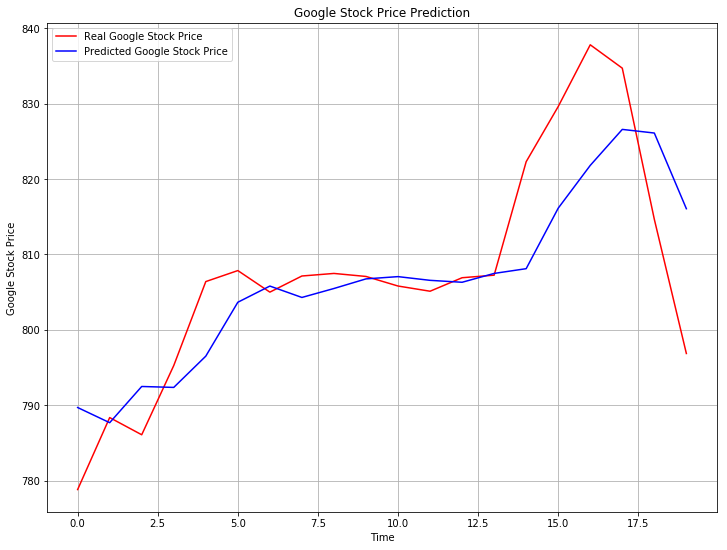

In [136]:
#Visualising the results
plt.figure(figsize=(12,9))
plt.plot(testing_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(Stock_price_predciton, color = 'blue', label = 'Predicted Google Stock Price')
plt.grid()
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()